# HMI PINN

## Create

In [ ]:
from setproctitle import setproctitle

setproctitle("HMI PINN")

In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "2"

import numpy as np 
import matplotlib.pyplot as plt
import torch
import time

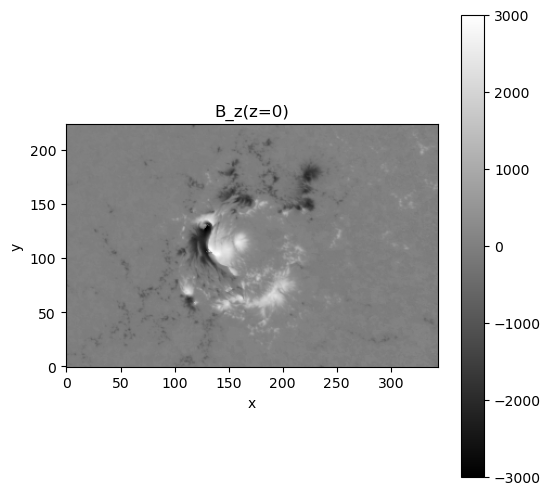

In [ ]:
input_path = '01_input/AR7115_20170906_090000/'
bottom_npy_path = os.path.join(input_path, 'b_bottom.npy')

with open(bottom_npy_path, 'rb') as f:
        b_bottom = np.load(f)

plt.close()
fig, ax = plt.subplots(figsize=(6,6))
CS = plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray', vmin=-3000, vmax=3000)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("B_z(z=0)")
fig.colorbar(CS)
plt.show()

In [ ]:
output_path = '02_output/AR7115_20170906_090000/PINN'

Nx, Ny, _ = b_bottom.shape
Nz = 160

spatial_norm = 160
b_norm = 2500

In [ ]:
# boundary_path = os.path.join(output_path, 'boundary')
# os.makedirs(boundary_path, exist_ok=True)

# boundary_npy_path = os.path.join(boundary_path, 'boundary_data.npy')

In [ ]:
total_iterations = 10000
log_interval = 1000

num_neurons = 256
num_layers = 8

w_ff = 1
w_div = 1
w_bc_init = 1000
decay_iterations = 25000

lr_init = 5e-4
lr_final = 5e-5
lr_decay_iterations = 50000

batch_size = 10000
num_worker = 2

In [ ]:
from zpinn.pinn_nf2_old import NF2Trainer

## cleanup

In [ ]:
from zpinn.create_pot import get_potential_boundary
from zpinn.pinn_nf2_cleanup import create_coordinates, NF2Trainer

### Create boundary data

In [ ]:
# bottom_values = b_bottom.reshape(-1, 3)
# bottom_bounds = (0, Nx-1, 0, Ny-1, 0, 0)
# bottom_coords = create_coordinates(bottom_bounds).reshape(-1, 3)

# coords, fields = get_potential_boundary(b_bottom[:, :, 2], Nz)

# for i in range(len(coords)):
#     coords[i] = np.reshape(coords[i], (-1, 3))
#     fields[i] = np.reshape(fields[i], (-1, 3))

# top_lateral_values = np.concatenate(fields) 
# top_lateral_coords = np.concatenate(coords)

# boundary_values = np.concatenate([top_lateral_values, bottom_values])
# boundary_coords = np.concatenate([top_lateral_coords, bottom_coords])

# normalized_boundary_values = boundary_values / b_norm
# normalized_boundary_coords = boundary_coords / spatial_norm

# boundary_data = np.stack([normalized_boundary_coords, normalized_boundary_values], 1)

# with open(boundary_npy_path, 'wb') as f:
#         np.save(f, boundary_data)

Potential Field: 100%|██████████| 380/380 [00:17<00:00, 21.28it/s]


### PINN

In [ ]:
torch.set_num_threads(num_worker)

In [ ]:
# with open(boundary_npy_path, 'rb') as f:
#         boundary_data = np.load(f)

In [ ]:
# trainer = NF2Trainer(output_path, b_bottom, height=Nz, b_norm=b_norm, spatial_norm=spatial_norm, meta_info=None, boundary_data=boundary_data)

In [ ]:
# trainer.setup(total_iterations=total_iterations, batch_size=batch_size, log_interval=log_interval, num_workers=num_worker,
#               num_neurons=num_neurons, num_layers=num_layers, w_ff=w_ff, w_div=w_div, w_bc_init=w_bc_init, decay_iterations=decay_iterations,
#               lr_init=lr_init, lr_final=lr_final, lr_decay_iterations=lr_decay_iterations)

In [ ]:
# start = time.time()

# trainer.train()

# runtime = time.time() - start
# print(f'Runtime --> total: {runtime:.2f}sec')

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training:   0%|          | 1/10000 [00:01<4:56:47,  1.78s/it]

[Iteration 000000/010000] [loss: 16.52411842] [loss_bc: 16.52409363; loss_div: 0.00001572; loss_ff: 0.00000918] [w_bc: 1000.000000, LR: 0.000500]


Training:   4%|▎         | 370/10000 [05:18<2:18:06,  1.16it/s]


KeyboardInterrupt: 

## PINN

In [ ]:
trainer = NF2Trainer(output_path, b_bottom, Nz, spatial_norm, b_norm,
                     meta_info=None, dim=num_neurons,
                     positional_encoding=False,
                     use_potential_boundary=True, w_div=w_div, w_ff=w_ff,
                     decay_iterations=decay_iterations, meta_path=None,
                     use_vector_potential=False, work_directory=None)

Potential Boundary: 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]


In [ ]:
start = time.time()

trainer.train(total_iterations, batch_size, log_interval, log_interval, num_workers=num_worker)

runtime = time.time() - start
print(f'Runtime --> total: {runtime:.2f}sec ({(runtime/(total_iterations-1)*1000):.2f}ms/iter.)')

Training:   0%|          | 0/10000 [00:00<?, ?it/s]

Training:   0%|          | 3/10000 [00:01<1:05:29,  2.54it/s]

[Iteration 000000/010000] [loss: 46.29030609] [loss_bc: 46.29027939; loss_div: 0.00000784; loss_ff: 0.00001879] [w_bc: 1000.000000, LR: 0.000500]


Training:  10%|█         | 1001/10000 [01:13<11:17, 13.29it/s]

[Iteration 001000/010000] [loss: 14.52375507] [loss_bc: 13.99534321; loss_div: 0.42152637; loss_ff: 0.10688599] [w_bc: 758.787207, LR: 0.000397]


Training:  20%|██        | 2001/10000 [02:26<10:08, 13.15it/s]

[Iteration 002000/010000] [loss: 8.07592010] [loss_bc: 7.38068962; loss_div: 0.46131894; loss_ff: 0.23391156] [w_bc: 575.598959, LR: 0.000316]


Training:  30%|███       | 3001/10000 [03:39<08:52, 13.15it/s]

[Iteration 003000/010000] [loss: 4.51929379] [loss_bc: 4.13307619; loss_div: 0.26917878; loss_ff: 0.11703874] [w_bc: 436.636463, LR: 0.000251]


Training:  40%|████      | 4003/10000 [04:53<07:22, 13.57it/s]

[Iteration 004000/010000] [loss: 2.90294433] [loss_bc: 2.59461427; loss_div: 0.22541040; loss_ff: 0.08291957] [w_bc: 331.222629, LR: 0.000199]


Training:  50%|█████     | 5001/10000 [06:06<06:32, 12.72it/s]

[Iteration 005000/010000] [loss: 1.98217273] [loss_bc: 1.79362655; loss_div: 0.13655625; loss_ff: 0.05198995] [w_bc: 251.258059, LR: 0.000158]


Training:  60%|██████    | 6001/10000 [07:19<05:01, 13.25it/s]

[Iteration 006000/010000] [loss: 1.56104231] [loss_bc: 1.43224633; loss_div: 0.09542333; loss_ff: 0.03337263] [w_bc: 190.598729, LR: 0.000126]


Training:  70%|███████   | 7001/10000 [08:32<03:51, 12.97it/s]

[Iteration 007000/010000] [loss: 1.18731451] [loss_bc: 1.08397412; loss_div: 0.07290906; loss_ff: 0.03043130] [w_bc: 144.583922, LR: 0.000100]


Training:  80%|████████  | 8001/10000 [09:46<02:32, 13.11it/s]

[Iteration 008000/010000] [loss: 0.77120471] [loss_bc: 0.69624954; loss_div: 0.05273697; loss_ff: 0.02221818] [w_bc: 109.678121, LR: 0.000079]


Training:  90%|█████████ | 9001/10000 [10:58<01:15, 13.16it/s]

[Iteration 009000/010000] [loss: 0.65456390] [loss_bc: 0.59668243; loss_div: 0.04002327; loss_ff: 0.01785820] [w_bc: 83.199363, LR: 0.000063]


Training: 100%|██████████| 10000/10000 [12:12<00:00, 13.66it/s]

[Iteration 010000/010000] [loss: 0.42385107] [loss_bc: 0.37678570; loss_div: 0.03235165; loss_ff: 0.01471372] [w_bc: 63.113171, LR: 0.000050]
[Iteration 010000/010000] [loss: 0.42385107] [loss_bc: 0.37668160; loss_div: 0.03235165; loss_ff: 0.01471372] [w_bc: 63.095734, LR: 0.000050]


In [ ]:
with open(os.path.join(output_path, 'losses.npy'), "rb") as f:
        losses = np.load(f)

Text(0, 0.5, 'Loss')

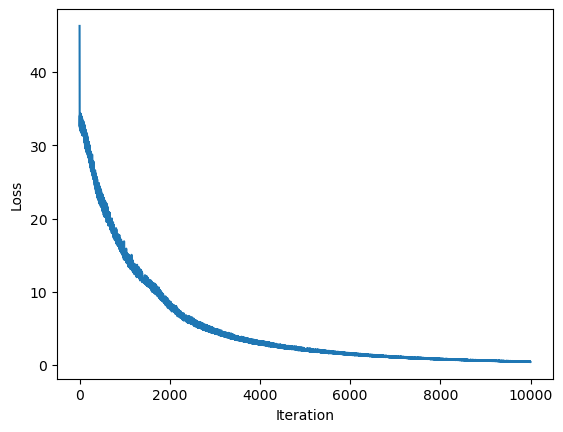

In [ ]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')

In [ ]:
with open(os.path.join(output_path, 'losses_no_weight.npy'), "rb") as f:
        losses_no_weight = np.load(f)

Text(0, 0.5, 'Loss (no weight)')

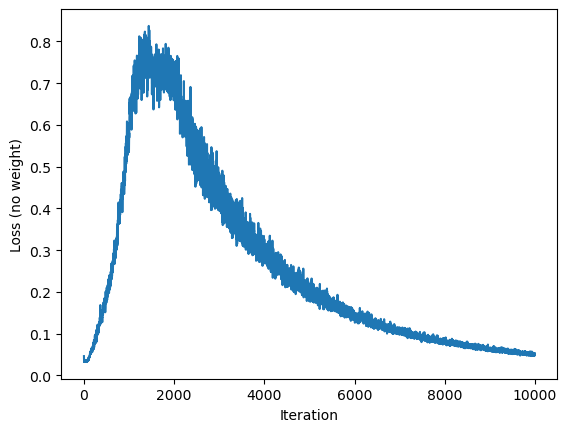

In [ ]:
plt.plot(losses_no_weight)
plt.xlabel('Iteration')
plt.ylabel('Loss (no weight)')

## Viz

In [ ]:
import pyvista as pv
from zpinn.pinn_nf2_visualization import pinn_cube, draw_grid

In [ ]:
pv.start_xvfb()
pv.global_theme.trame.server_proxy_enabled = True
pv.set_jupyter_backend('static')

In [ ]:
eval_path = '03_eval/AR7115_20170906_090000/PINN'
os.makedirs(eval_path, exist_ok=True)
vtk_path = os.path.join(eval_path, f'B_pinn_{total_iterations}.vtk')

### vtk

In [ ]:
# def create_physical_coordinates(bounds, resolutions):
#     x_1D = np.linspace(bounds[0], bounds[1], resolutions[0])
#     y_1D = np.linspace(bounds[2], bounds[3], resolutions[1])
#     z_1D = np.linspace(bounds[4], bounds[5], resolutions[2])
#     x_spacing = np.diff(x_1D)[0]
#     y_spacing = np.diff(y_1D)[0]
#     z_spacing = np.diff(z_1D)[0]
#     spacing = (x_spacing, y_spacing, z_spacing)
#     origin = (x_1D[0], y_1D[0], z_1D[0]) # The bottom left corner of the data set
#     grid = pv.ImageData(dimensions=resolutions, spacing=spacing, origin=origin)
#     return grid

In [ ]:
# device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
# domain_bounds = (0, Nx-1, 0, Ny-1, 0, Nz-1)
# resolutions = (Nx, Ny, Nz)
# grid = create_physical_coordinates(domain_bounds, resolutions)
# domain_coords = np.array(grid.points)
# normalized_domain_coords = domain_coords / spatial_norm
# normalized_domain_coords = normalized_domain_coords
# normalized_domain_coords = torch.tensor(normalized_domain_coords, dtype=torch.float32)
# n_batch = int(np.ceil(normalized_domain_coords.shape[0] / batch_size))

# cube = []
# k=0
# batch_coords = normalized_domain_coords[k*batch_size : (k+1)*batch_size]
# batch_coords.to(device)

In [ ]:
# pinn.model.to(batch_coords.device)(batch_coords)

In [ ]:
iterations = np.arange(0, total_iterations+1, log_interval)

for epo in iterations:
    save_path = os.path.join(output_path, 'model_%06d.pt' % epo)
    pinn = pinn_cube(save_path)
    pinn.calculate_magnetic_fields(batch_size=batch_size)
    vtk_paths = os.path.join(eval_path, f'B_pinn_{epo}.vtk')
    pinn.grid.save(vtk_paths)

100%|██████████| 1233/1233 [00:38<00:00, 31.97it/s]


In [ ]:
# save_path = os.path.join(output_path, 'model_%06d.pt' % total_iterations)
# pinn = pinn_cube(save_path)
# pinn.calculate_magnetic_fields(batch_size=batch_size)

In [ ]:
# pinn.state

In [ ]:
# pinn.grid.save(vtk_path)

### load

In [ ]:
B_pinn_mesh = pv.read(vtk_path)

In [ ]:
B_pinn_grid = draw_grid(B_pinn_mesh)

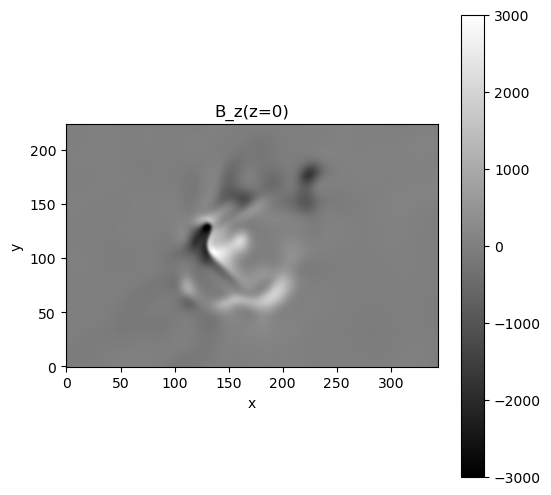

In [ ]:
B_pinn_grid.plt_Bz_imshow(z=0, vmin=-3000, vmax=3000)

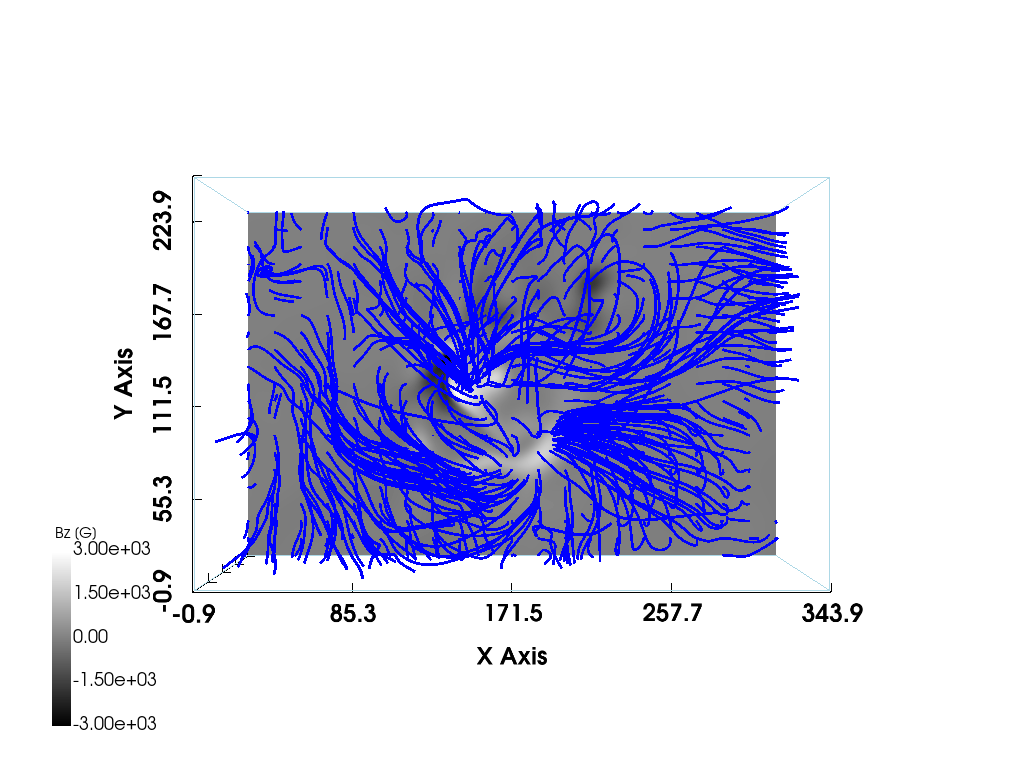

In [ ]:
B_pinn_grid.pv_streamline_Bz(camera_position='xy', i_resolution=20, j_resolution=20, vmin=-3000, vmax=3000)

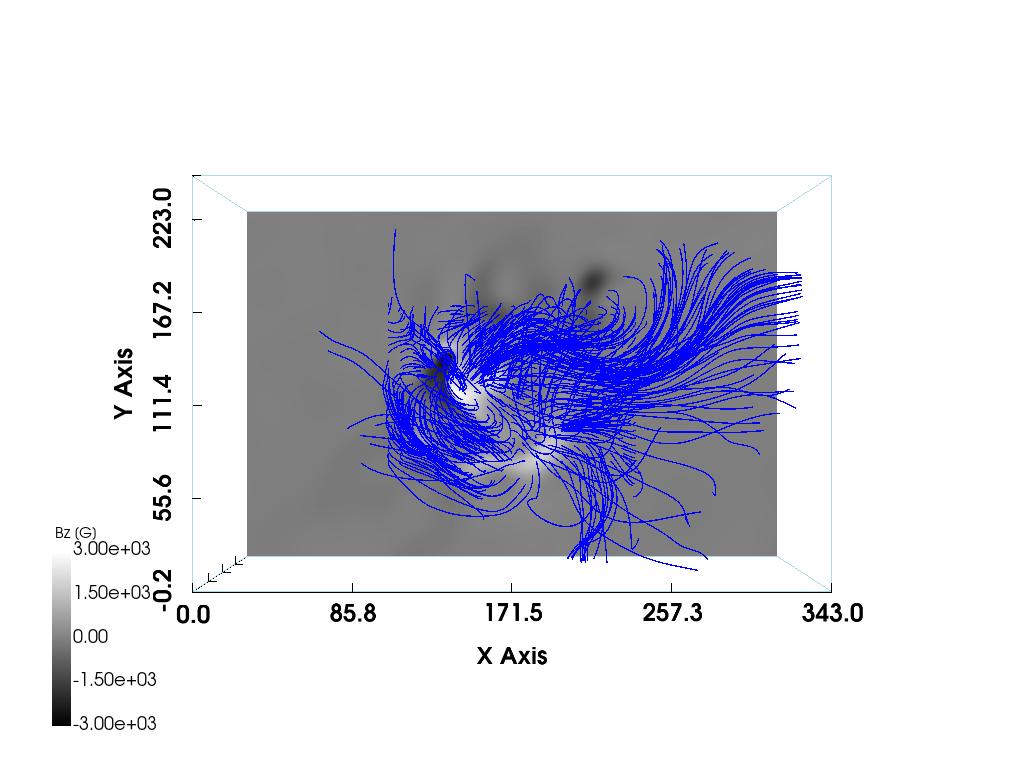

In [ ]:
B_pinn_grid.pv_streamline_Bz(camera_position='xy', i_siz=160, j_siz=100, i_resolution=20, j_resolution=20, vmin=-3000, vmax=3000)